In [161]:
import pandas as pd
import geopandas
import numpy 
import seaborn as sns
import matplotlib.pyplot as plt
import random




In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
import os

In [19]:
os.chdir('C:/Users/15139/Downloads')

In [21]:
city_temperature = pd.read_csv("city_temperature.csv") #Reading the csv file
city_temperature.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [22]:
city_temperature.info() #Showing the structure of the data and the number of columns
city_temperature.shape 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


(2906327, 8)

In [23]:
# Analysis

city_temperature.Country.unique()

array(['Algeria', 'Burundi', 'Benin', 'Central African Republic', 'Congo',
       'Egypt', 'Ethiopia', 'Gabon', 'Gambia', 'Guinea', 'Guinea-Bissau',
       'Ivory Coast', 'Kenya', 'Morocco', 'Madagascar', 'Mauritania',
       'Malawi', 'Mozambique', 'Namibia', 'Nigeria', 'Senegal',
       'Sierra Leone', 'South Africa', 'Togo', 'Tunisia', 'Tanzania',
       'Uganda', 'Zambia', 'Bangladesh', 'China', 'Hong Kong', 'India',
       'Indonesia', 'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Laos',
       'Malaysia', 'Mongolia', 'Myanmar (Burma)', 'Nepal', 'North Korea',
       'Pakistan', 'Philippines', 'Singapore', 'South Korea', 'Sri Lanka',
       'Taiwan', 'Tajikistan', 'Thailand', 'Turkmenistan', 'Uzbekistan',
       'Vietnam', 'Australia', 'New Zealand', 'Albania', 'Austria',
       'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Georgia', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Latvia', 'Ma

In [56]:

city_temp_invalid_temp = city_temperature[city_temperature.AvgTemperature == -99.0].index
city_temperature = city_temperature.drop(city_temp_invalid_temp, axis='index')
display(city_temperature)


Temperature_check = city_temperature.groupby("Year", as_index = False)["AvgTemperature"].mean()
display(Temperature_check)



,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


,Year,AvgTemperature
0,1995,59.421659
1,1996,58.674830
2,1997,59.133617
3,1998,60.870440
4,1999,60.327687
5,2000,59.699026
6,2001,60.326280
7,2002,60.256346
8,2003,59.998360
9,2004,60.092934


In [66]:
import numpy as np


In [68]:
# Select numeric columns only
numeric_columns = city_temperature.select_dtypes(include=[np.number])

# Apply the mean() function to the numeric columns only
average_temperatures = city_temperature[city_temperature['Region'] == 'North America'].groupby('Year')[numeric_columns.columns].mean()


In [70]:
from sklearn import linear_model

x = list(map(lambda val: [val], average_temperatures.index))
y = list(average_temperatures.AvgTemperature)

reg = linear_model.Ridge(alpha=1)
reg.fit(x, y)
prediction = reg.predict(x)

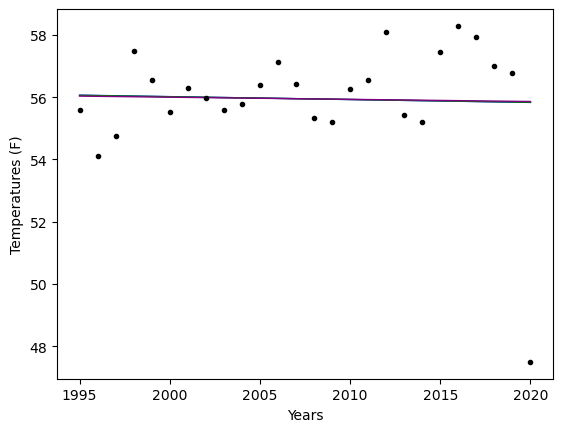

In [74]:
reg2 = linear_model.Ridge(alpha=50)
reg2.fit(x, y)
prediction2 = reg2.predict(x)

reg3 = linear_model.Ridge(alpha=500)
reg3.fit(x, y)
prediction3 = reg3.predict(x)


plt.xlabel('Years')
plt.ylabel('Temperatures (F)')

plt.errorbar(average_temperatures.index, average_temperatures.AvgTemperature, fmt='.', color='black')

plt.plot(x, prediction, color='blue', linewidth='1')
plt.plot(x, prediction2, color='green', linewidth='1')
plt.plot(x, prediction3, color='purple', linewidth='1')
plt.show()

In [76]:
city_temperature_US = city_temperature[city_temperature["Country"] == "US"]
city_temperature_US.head()


,Region,Country,State,City,Month,Day,Year,AvgTemperature
1450990,North America,US,Alabama,Birmingham,1,1,1995,50.7
1450991,North America,US,Alabama,Birmingham,1,2,1995,37.2
1450992,North America,US,Alabama,Birmingham,1,3,1995,33.2
1450993,North America,US,Alabama,Birmingham,1,4,1995,33.3
1450994,North America,US,Alabama,Birmingham,1,5,1995,26.4


In [78]:
city_temperature_US.shape

(1450555, 8)

In [80]:
#checking for null values and removing invalid values

city_temperature_US.isnull().sum()

Region            0
Country           0
State             0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64

In [82]:
city_temperature_US.isnull().values.any()


False

In [84]:
max(city_temperature_US.AvgTemperature)

107.7

In [86]:
min(city_temperature_US.AvgTemperature)

-50.0

In [88]:
city_temp_US_invalid_temp = city_temperature_US[city_temperature_US.AvgTemperature == -99.0].index


In [90]:
city_temperature_US = city_temperature_US.drop(city_temp_US_invalid_temp, axis='index')

In [94]:
#Calculating the overall temperatures over the years in USA
Average_Temp_US = city_temperature_US.groupby("Year")["AvgTemperature"].mean()

In [96]:
Average_Temp_US.tail(5)

Year
2016    58.316256
2017    57.943395
2018    57.039166
2019    56.780607
2020    47.399678
Name: AvgTemperature, dtype: float64

Text(0, 0.5, 'Average Temperature')

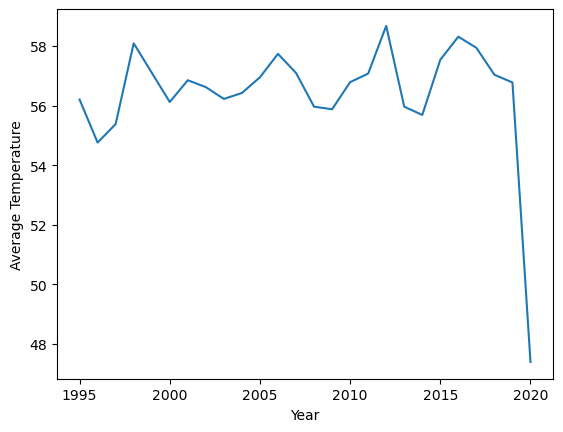

In [98]:
plt.plot(Average_Temp_US)
plt.xlabel("Year")
plt.ylabel("Average Temperature")

In [104]:
Ohio_temperature = city_temperature[city_temperature['State'] == 'Ohio']
display(Ohio_temperature)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
2374948,North America,US,Ohio,Akron Canton,1,1,1995,40.3
2374949,North America,US,Ohio,Akron Canton,1,2,1995,21.2
2374950,North America,US,Ohio,Akron Canton,1,3,1995,19.4
2374951,North America,US,Ohio,Akron Canton,1,4,1995,13.1
2374952,North America,US,Ohio,Akron Canton,1,5,1995,7.7
...,...,...,...,...,...,...,...,...
2439798,North America,US,Ohio,Youngstown,5,9,2020,33.9
2439799,North America,US,Ohio,Youngstown,5,10,2020,46.0
2439800,North America,US,Ohio,Youngstown,5,11,2020,40.9
2439801,North America,US,Ohio,Youngstown,5,12,2020,43.9


In [163]:
#Calculating the Temperature of the Cities in Ohio over the years
Average_Temp_US_Ohio = city_temperature_US.groupby("City")["AvgTemperature"].mean()

Text(0, 0.5, 'Average Temperature')

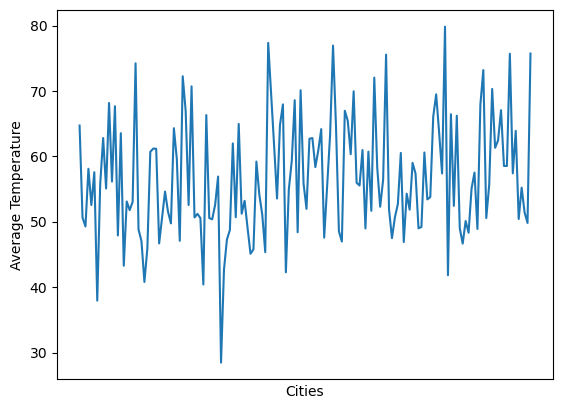

In [110]:
plt.plot(Average_Temp_US_Ohio)
plt.xlabel("Cities")
plt.xticks([])
plt.ylabel("Average Temperature")

In [112]:
#Calculating Ohio Temperature in 2000
Ohio_temperature_2000 = Ohio_temperature[(Ohio_temperature["Year"] == 2000)]
display(Ohio_temperature_2000)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2376774,North America,US,Ohio,Akron Canton,1,1,2000,35.4
2376775,North America,US,Ohio,Akron Canton,1,2,2000,50.7
2376776,North America,US,Ohio,Akron Canton,1,3,2000,53.3
2376777,North America,US,Ohio,Akron Canton,1,4,2000,46.4
2376778,North America,US,Ohio,Akron Canton,1,5,2000,28.0
...,...,...,...,...,...,...,...,...
2432725,North America,US,Ohio,Youngstown,12,27,2000,18.0
2432726,North America,US,Ohio,Youngstown,12,28,2000,14.5
2432727,North America,US,Ohio,Youngstown,12,29,2000,15.1
2432728,North America,US,Ohio,Youngstown,12,30,2000,18.0


In [114]:
Average_Temp_US_Ohio_2000 = Ohio_temperature_2000.groupby("City")["AvgTemperature"].mean()
display(Average_Temp_US_Ohio_2000)

City
Akron Canton    49.251913
Cincinnati      53.341257
Cleveland       50.176503
Columbus        52.502186
Dayton          51.689071
Toledo          49.950273
Youngstown      49.086339
Name: AvgTemperature, dtype: float64

Text(0, 0.5, 'Average Temperature')

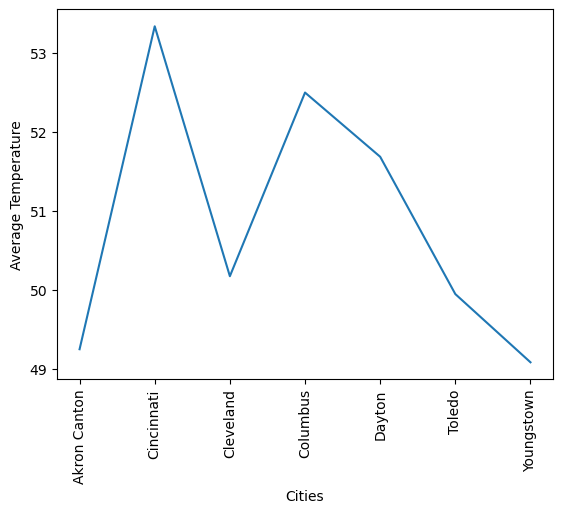

In [116]:
plt.plot(Average_Temp_US_Ohio_2000)
plt.xlabel("Cities")
plt.xticks(rotation=90)
plt.ylabel("Average Temperature")

In [119]:
#Calculating Ohio Temperature in 2010
Ohio_temperature_2010 = Ohio_temperature[(Ohio_temperature["Year"] == 2010)]
display(Ohio_temperature_2010)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2380427,North America,US,Ohio,Akron Canton,1,1,2010,27.4
2380428,North America,US,Ohio,Akron Canton,1,2,2010,15.3
2380429,North America,US,Ohio,Akron Canton,1,3,2010,8.4
2380430,North America,US,Ohio,Akron Canton,1,4,2010,18.9
2380431,North America,US,Ohio,Akron Canton,1,5,2010,20.4
...,...,...,...,...,...,...,...,...
2436377,North America,US,Ohio,Youngstown,12,27,2010,20.3
2436378,North America,US,Ohio,Youngstown,12,28,2010,20.4
2436379,North America,US,Ohio,Youngstown,12,29,2010,24.3
2436380,North America,US,Ohio,Youngstown,12,30,2010,31.9


In [121]:
Average_Temp_US_Ohio_2010 = Ohio_temperature_2010.groupby("City")["AvgTemperature"].mean()
display(Average_Temp_US_Ohio_2010)

City
Akron Canton    51.027397
Cincinnati      54.721096
Cleveland       52.910137
Columbus        53.657260
Dayton          52.698356
Toledo          51.473151
Youngstown      50.581370
Name: AvgTemperature, dtype: float64

Text(0, 0.5, 'Average Temperature')

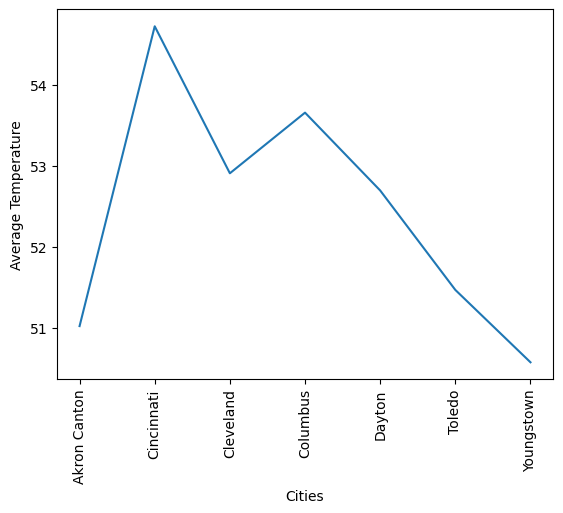

In [123]:
plt.plot(Average_Temp_US_Ohio_2010)
plt.xlabel("Cities")
plt.xticks(rotation=90)
plt.ylabel("Average Temperature")

In [125]:
#Calculating Ohio Temperature in 2020
Ohio_temperature_2020 = Ohio_temperature[(Ohio_temperature["Year"] == 2020)]
display(Ohio_temperature_2020)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2384079,North America,US,Ohio,Akron Canton,1,1,2020,30.4
2384080,North America,US,Ohio,Akron Canton,1,2,2020,38.1
2384081,North America,US,Ohio,Akron Canton,1,3,2020,47.3
2384082,North America,US,Ohio,Akron Canton,1,4,2020,41.2
2384083,North America,US,Ohio,Akron Canton,1,5,2020,31.2
...,...,...,...,...,...,...,...,...
2439798,North America,US,Ohio,Youngstown,5,9,2020,33.9
2439799,North America,US,Ohio,Youngstown,5,10,2020,46.0
2439800,North America,US,Ohio,Youngstown,5,11,2020,40.9
2439801,North America,US,Ohio,Youngstown,5,12,2020,43.9


In [127]:
Average_Temp_US_Ohio_2020 = Ohio_temperature_2020.groupby("City")["AvgTemperature"].mean()
display(Average_Temp_US_Ohio_2020)

City
Akron Canton    40.686567
Cincinnati      44.592537
Cleveland       40.682090
Columbus        42.428358
Dayton          42.666418
Toledo          40.279851
Youngstown      39.582090
Name: AvgTemperature, dtype: float64

Text(0, 0.5, 'Average Temperature')

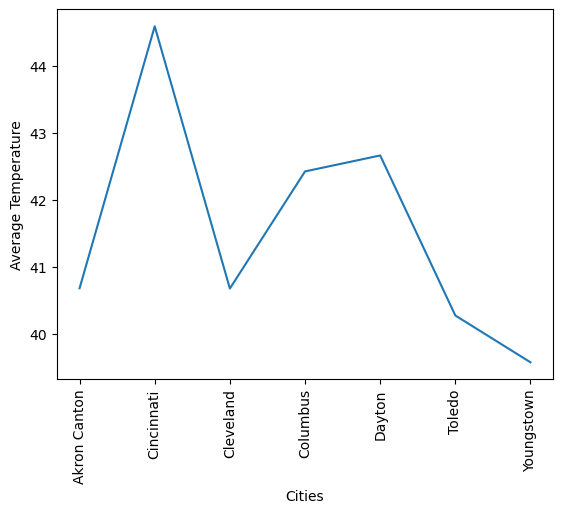

In [129]:
plt.plot(Average_Temp_US_Ohio_2020)
plt.xlabel("Cities")
plt.xticks(rotation=90)
plt.ylabel("Average Temperature")

In [132]:
#For USA on the whole in 2019 - 2020

display(city_temperature_US)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1450990,North America,US,Alabama,Birmingham,1,1,1995,50.7
1450991,North America,US,Alabama,Birmingham,1,2,1995,37.2
1450992,North America,US,Alabama,Birmingham,1,3,1995,33.2
1450993,North America,US,Alabama,Birmingham,1,4,1995,33.3
1450994,North America,US,Alabama,Birmingham,1,5,1995,26.4
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [134]:
city_temperature_US_2019 = city_temperature_US[(city_temperature_US["Year"] == 2019)]
display(city_temperature_US_2019)
city_temperature_US_2019.State.unique()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1459756,North America,US,Alabama,Birmingham,1,1,2019,60.3
1459757,North America,US,Alabama,Birmingham,1,2,2019,51.1
1459758,North America,US,Alabama,Birmingham,1,3,2019,51.4
1459759,North America,US,Alabama,Birmingham,1,4,2019,54.7
1459760,North America,US,Alabama,Birmingham,1,5,2019,47.5
...,...,...,...,...,...,...,...,...
2899401,North America,US,Wyoming,Cheyenne,12,27,2019,25.1
2899402,North America,US,Wyoming,Cheyenne,12,28,2019,23.3
2899403,North America,US,Wyoming,Cheyenne,12,29,2019,17.5
2899404,North America,US,Wyoming,Cheyenne,12,30,2019,17.6


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'District of Columbia', 'Maryland',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [136]:
city_temperature_US_2019_2020 = city_temperature_US[(city_temperature_US["Year"] >= 2019) & (city_temperature_US["Month"] <= 5)]
Average_Temp_US_2019_2020 = city_temperature_US_2019_2020.groupby(["State","Month","Year"],as_index=False)["AvgTemperature"].mean()
display(Average_Temp_US_2019_2020)

,State,Month,Year,AvgTemperature
0,Alabama,1,2019,46.657258
1,Alabama,1,2020,50.829032
2,Alabama,2,2019,57.408929
3,Alabama,2,2020,51.708621
4,Alabama,3,2019,55.913710
...,...,...,...,...
495,Wyoming,3,2020,36.170968
496,Wyoming,4,2019,43.471667
497,Wyoming,4,2020,40.301667
498,Wyoming,5,2019,46.100000


In [138]:
Average_Temp_US_2019_2020 = Average_Temp_US_2019_2020.groupby(["State","Month","Year"],as_index=False)["AvgTemperature"].mean()




In [140]:
display(Average_Temp_US_2019_2020)

,State,Month,Year,AvgTemperature
0,Alabama,1,2019,46.657258
1,Alabama,1,2020,50.829032
2,Alabama,2,2019,57.408929
3,Alabama,2,2020,51.708621
4,Alabama,3,2019,55.913710
...,...,...,...,...
495,Wyoming,3,2020,36.170968
496,Wyoming,4,2019,43.471667
497,Wyoming,4,2020,40.301667
498,Wyoming,5,2019,46.100000


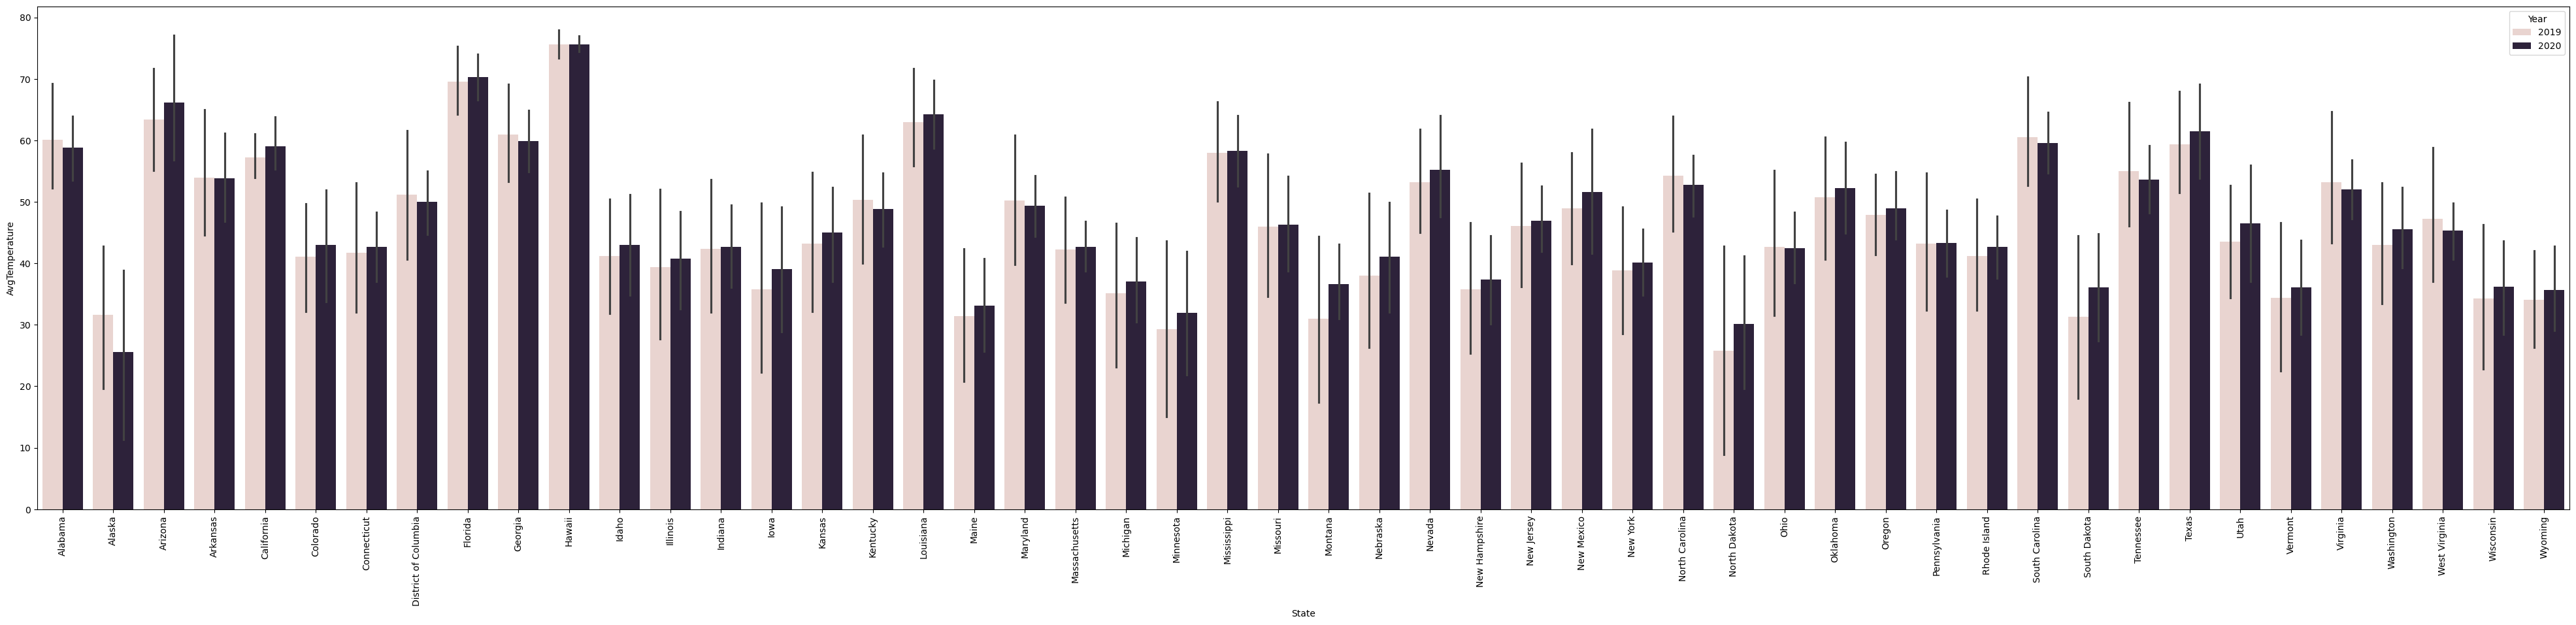

In [142]:

plt.figure(figsize=(50,10))
sns.barplot(x = Average_Temp_US_2019_2020["State"], y=Average_Temp_US_2019_2020["AvgTemperature"],hue=Average_Temp_US_2019_2020["Year"], data=Average_Temp_US_2019_2020)
plt.xticks(rotation=90)
plt.show()

In [165]:
## For Ohio state 2019-2020 
Average_Temp_US_Ohio = city_temperature_US.groupby("City")["AvgTemperature"].mean()

In [149]:
Ohio_temperature_2019_2020 = Ohio_temperature[(Ohio_temperature["Year"] >= 2019) & (Ohio_temperature["Month"] <= 5)]
Average_Temp_US_Ohio_2019_2020 = Ohio_temperature_2019_2020.groupby(["City","Month","Year"],as_index=False)["AvgTemperature"].mean()
display(Average_Temp_US_Ohio_2019_2020)

,City,Month,Year,AvgTemperature
0,Akron Canton,1,2019,26.587097
1,Akron Canton,1,2020,34.551613
2,Akron Canton,2,2019,31.760714
3,Akron Canton,2,2020,32.868966
4,Akron Canton,3,2019,35.890323
...,...,...,...,...
65,Youngstown,3,2020,43.748387
66,Youngstown,4,2019,50.910000
67,Youngstown,4,2020,45.736667
68,Youngstown,5,2019,61.435484


In [151]:
Average_Temp_US_Ohio_2019_2020 = Average_Temp_US_Ohio_2019_2020.groupby(["City","Month","Year"],as_index=False)["AvgTemperature"].mean()



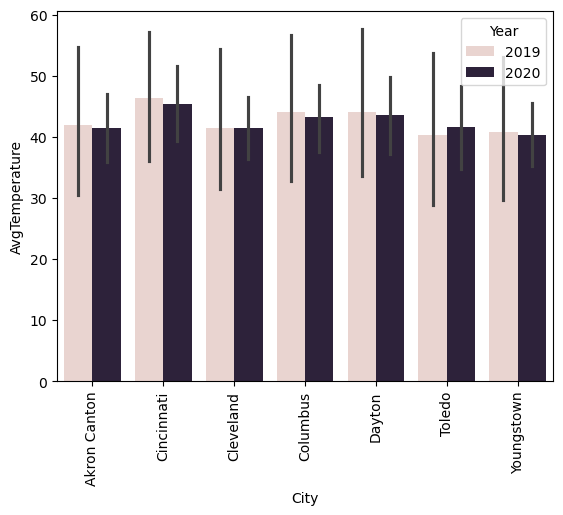

In [153]:

plt.figure()
sns.barplot(x = Average_Temp_US_Ohio_2019_2020["City"], y=Average_Temp_US_Ohio_2019_2020["AvgTemperature"],hue=Average_Temp_US_Ohio_2019_2020["Year"], data=Average_Temp_US_Ohio_2019_2020)
plt.xticks(rotation=90)
plt.show()